#Loading data.

#LOADING DATA

In [1]:
link='/content/drive/MyDrive/CodingDojo/01-Fundamentals/Week02/sales_predictions_2023.csv'

#importing libraries.

In [2]:
#importing libraries.
import pandas as pd
import numpy as np
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt



In [3]:
#converting data.
df_predictions=pd.read_csv(link)
df_predictions.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


#DATA CLEANING

In [4]:
#checking for duplicates.
duplicates=df_predictions.duplicated().sum()
duplicates

0

In [5]:
#checking for missing values.
missing=df_predictions.isna().sum()
missing

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [6]:
#inspecting item weight.
df_predictions['Item_Weight'].isna().sum()

1463

In [7]:
#filling in missing
df_predictions['Item_Weight']=df_predictions['Item_Weight'].fillna('MISSING')
df_predictions['Item_Weight'].isna().sum()

0

In [8]:
#inspecting and filling outlet size.
df_predictions['Outlet_Size']=df_predictions['Outlet_Size'].fillna("MISSING")
df_predictions['Outlet_Size'].value_counts(dropna=False)

Medium     2793
MISSING    2410
Small      2388
High        932
Name: Outlet_Size, dtype: int64

In [9]:
df_predictions['Outlet_Size'].isna().sum()

0

In [11]:
#addressing inconsistencies.
column=df_predictions.select_dtypes("object").columns
column

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Type',
       'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

In [12]:
#looping over columns.
for col in column:
  print (f"value counts for{col}")
  print (df_predictions[col].value_counts())
  print('/n')

value counts forItem_Identifier
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64
/n
value counts forItem_Weight
MISSING    1463
12.15        86
17.6         82
13.65        77
11.8         76
           ... 
7.275         2
7.685         1
9.42          1
6.52          1
5.4           1
Name: Item_Weight, Length: 416, dtype: int64
/n
value counts forItem_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64
/n
value counts forItem_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks           

In [43]:
#addressing inconsistencies in iten fat content.
df_predictions['Item_Fat_Content']=df_predictions['Item_Fat_Content'].replace({'LF':'Low Fat','low fat':'Low Fat','reg':'Regular'})
df_predictions['Item_Fat_Content'].value_counts()

Series([], Name: Item_Fat_Content, dtype: int64)

In [17]:
Item_Fat_Content=df_predictions['Item_Fat_Content']
Item_Fat_Content

0       Low Fat
1       Regular
2       Low Fat
3       Regular
4       Low Fat
         ...   
8518    Low Fat
8519    Regular
8520    Low Fat
8521    Regular
8522    Low Fat
Name: Item_Fat_Content, Length: 8523, dtype: object

In [18]:
link='/content/drive/MyDrive/CodingDojo/01-Fundamentals/Week02/cleaned_prediction.csv'
df_predictions.to_csv(link)

clean=pd.read_csv(link)
clean.head()


,Unnamed: 0,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,0,FDA15,9.3,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,2,FDN15,17.5,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,3,FDX07,19.2,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,MISSING,Tier 3,Grocery Store,732.3800
4,4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


#DATA VISUALISATION

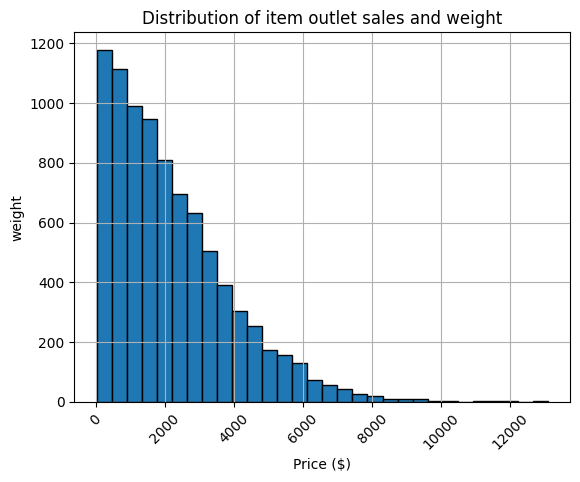

In [ ]:
#creating histograms
# Add title and labels
x="Item_Outlet_Sales"
y="Item_Weight"
ax = clean['Item_Outlet_Sales'].hist(bins = 30, edgecolor = 'black')
ax.tick_params(axis='x', rotation = 45)
ax.ticklabel_format(style='plain')
ax.set_title('Distribution of item outlet sales and weight')
ax.set_xlabel('Price ($)')
ax.set_ylabel('weight');

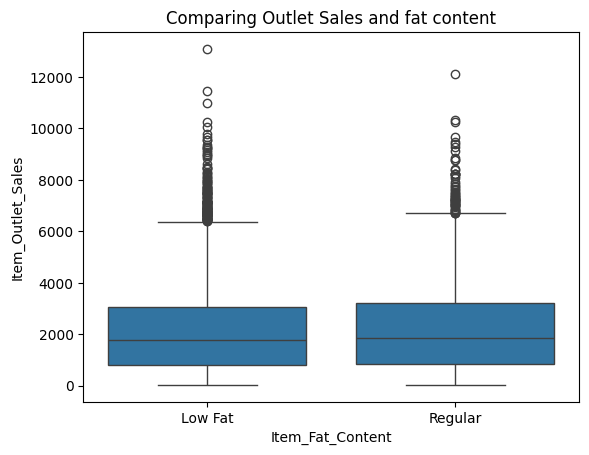

In [19]:
#making boxplots.
ax = sns.boxplot(data=clean, x='Item_Fat_Content', y="Item_Outlet_Sales")
ax.set_title("Comparing Outlet Sales and fat content");


In [40]:
#countplot for categorical data
val_counts = clean['Item_Type'].value_counts()
val_counts.head()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Name: Item_Type, dtype: int64

In [33]:
#setting item weight as the index.
val_counts.index

Index(['Fruits and Vegetables', 'Snack Foods', 'Household', 'Frozen Foods',
       'Dairy', 'Canned', 'Baking Goods', 'Health and Hygiene', 'Soft Drinks',
       'Meat', 'Breads', 'Hard Drinks', 'Others', 'Starchy Foods', 'Breakfast',
       'Seafood'],
      dtype='object')

<ipython-input-39-4188077b6db2>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right');


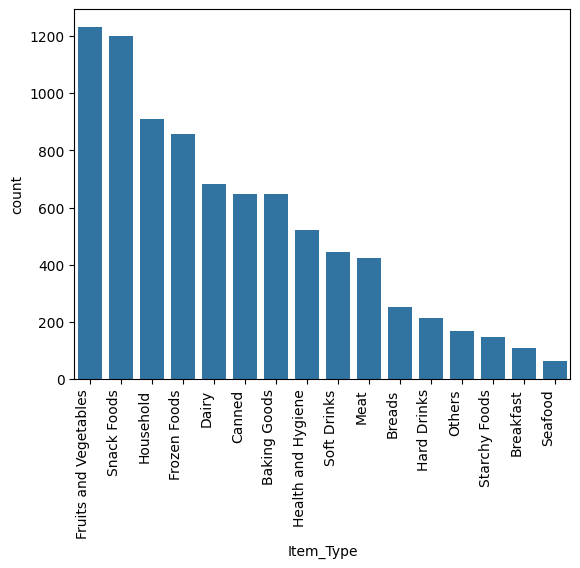

In [39]:
#plotting a count plot.
ax = sns.countplot(data=clean, x="Item_Type",
                   order=val_counts.index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right');

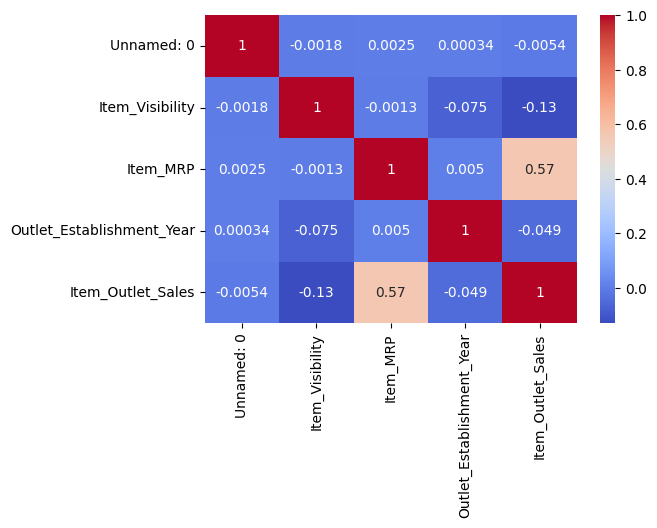

In [38]:
#creating a heatmap
corr = clean.corr(numeric_only = True)
corr.round(2)
fig, ax = plt.subplots(figsize=(6,4))
sns.heatmap(corr, cmap = 'coolwarm', annot = True, ax=ax);

#there is a moderate corelation between itewm MRP and item outlet sales and a low correlation between the rest of te features.

#MACHINE LEARNING

In [44]:
#creating a copy
df_clean=clean.copy()
df_clean

,Unnamed: 0,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,0,FDA15,9.3,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,2,FDN15,17.5,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,3,FDX07,19.2,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,MISSING,Tier 3,Grocery Store,732.3800
4,4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,8519,FDS36,8.38,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,MISSING,Tier 2,Supermarket Type1,549.2850
8520,8520,NCJ29,10.6,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,8521,FDN46,7.21,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [45]:
#filling in MISSING placeholder
x='Item_Weight'
placeholder='MISSING'
df_clean['Item_Weight']=df_clean['Item_Weight'].fillna(placeholder)

#DATA DICTIONARY
##Variable Name	Description
Item_Identifier	Product ID
Item_Weight	Weight of product
Item_Fat_Content	Whether the product is low-fat or regular
Item_Visibility	The percentage of total display area of all products in a store allocated to the particular product
Item_Type	The category to which the product belongs
Item_MRP	Maximum Retail Price (list price) of the product
Outlet_Identifier	Store ID
Outlet_Establishment_Year	The year in which store was established
Outlet_Size	The size of the store in terms of ground area covered
Outlet_Location_Type	The type of area in which the store is located
Outlet_Type	Whether the outlet is a grocery store or some sort of supermarket
Item_Outlet_Sales	Sales of the product in the particular store. This is the target variable to be predicted.

In [51]:
#univariate of categories visualisation.
x='Item_Type'
df_clean['Item_Type'].dtype

dtype('O')

In [68]:
#defining formulae
x = 'Item_Type'
# Before filling in the NA values with a placeholder, let's get the count and percentage
df_clean = clean.copy()
# Save null values counts
null_count = df_clean[x].isna().sum()
# Calculate the percentage of null values
null_percentage = null_count/len(df_clean)* 100
# Print the null value info with an f-statement
print(f"- NaN's Found: {null_count} ({round(null_percentage,2)}%)")

- NaN's Found: 0 (0.0%)


In [64]:
#unique values
nunique = df_clean[x].nunique()
print(f"- Unique Values: {nunique}")

- Unique Values: 16


In [65]:
# Get the value counts
value_counts = df_clean[x].value_counts(dropna=False)
value_counts


Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [66]:
 #Check the data type of this output
type(value_counts)

pandas.core.series.Series

In [67]:
# Isolate the name of the most common value by using the index
most_common_value = value_counts.index[0]
most_common_value

# Isolate the number of entries having the most common value by using .values
frequency = value_counts.values[0]
frequency

# Get the percentage of the most common value
percentage_most_common =(frequency / len(df_clean) *100)
percentage_most_common


# Include a print statement and round the percent
print(f"- Most common value: '{most_common_value}' occurs {frequency} times ({round(percentage_most_common,2)}%)")



# print message if quasi-constant or constant (most common val more than 98% of data)
if percentage_most_common >98:
  print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
else:
  print("- Not constant or quasi-constant.")

- Most common value: 'Fruits and Vegetables' occurs 1232 times (14.46%)
- Not constant or quasi-constant.


In [69]:
#calling function
def explore_categorical(df_clean,x,placeholder='MISSING'):
  df_clean=clean.copy()
  df_clean['Item_Type']=df_clean['Item_Type'].fillna(placeholder)
  fig, ax = plt.subplots(figsize=(6,4))
  # Plotting a count plot
  sns.countplot(data=df_clean, x=x, ax=ax)
  # Rotate Tick Labels for long names
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
  # Add. atitle with the feature name included
  ax.set_title(f"Column: {x}")
  fig.tight_layout()
  plt.show()
  print(f"- NaN's Found: {null_count} ({round(null_percentage,2)}%)")
  # Print cardinality info
  nunique = df_clean[x].nunique()
  print(f"- Unique Values: {nunique}")
  # First find value counts of feature
  value_counts = df_clean[x].value_counts(dropna=False)
  # Define the most common value
  most_common_value = value_counts.index[0]
  # Define the frequency of the most common value
  frequency = value_counts.values[0]
  # Calculate the percentage of the most common value
  percentage_most_common = frequency / len(df_clean) * 100
  # Print the results
  print(f"- Most common value: '{most_common_value}' occurs {frequency} times ({round(percentage_most_common,2)}%)")
  # print message if quasi-constant or constant (most common val more than 98% of data)
  if percentage_most_common > 98:
    print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
  else:
    print("- Not constant or quasi-constant.")
  return fig, ax


<ipython-input-69-7c3c459a4287>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


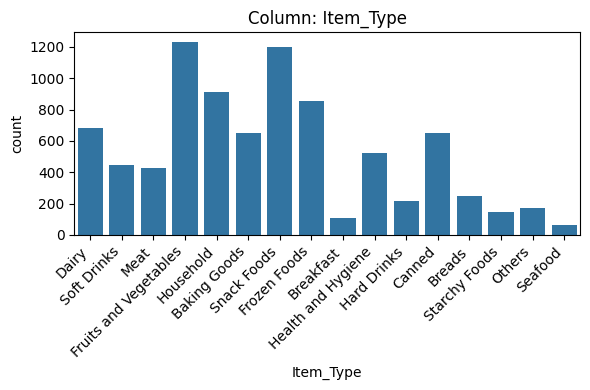

- NaN's Found: 0 (0.0%)
- Unique Values: 16
- Most common value: 'Fruits and Vegetables' occurs 1232 times (14.46%)
- Not constant or quasi-constant.


In [70]:
#testing function on item type
explore_categorical(df_clean,'Item_Type');

#Answering questions.

##it is a categorical feature.
##0 null values
##neither constant nor quasi constant
##cardinality is high
##yes we would know the feature because of its labels.
## there is nothing to exclude.

#multivariate visualisation.

In [77]:
#creating function.

def plot_categorical_vs_target(df_clean, x, y='Item_Outlet_Sales',figsize=(6,4),
                            fillna = True, placeholder = 'MISSING'):
  # Make a copy of the dataframe and fillna
  df_clean = clean.copy()
  # fillna with placeholder
  if fillna == True:
   df_clean[x] = df_clean[x].fillna(placeholder)

  # or drop nulls prevent unwanted 'nan' group in stripplot
  else:
    df_clean = df_clean.dropna(subset=[x])
  # Create the figure and subplots
  fig, ax = plt.subplots(figsize=figsize)

    # Barplot
  sns.barplot(data=df_clean, x=x, y=y, ax=ax, alpha=0.6,
              linewidth=1, edgecolor='black', errorbar=None)

  # Boxplot
  sns.stripplot(data=df_clean, x=x, y=y, hue=x, ax=ax, legend=False,
                edgecolor='white', linewidth=0.5,
                size=3,zorder=0)
  # Rotate xlabels
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

  # Add a title
  ax.set_title(f"{x} vs. {y}")
  fig.tight_layout()
  return fig, ax

<ipython-input-77-3b9d133a3198>:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


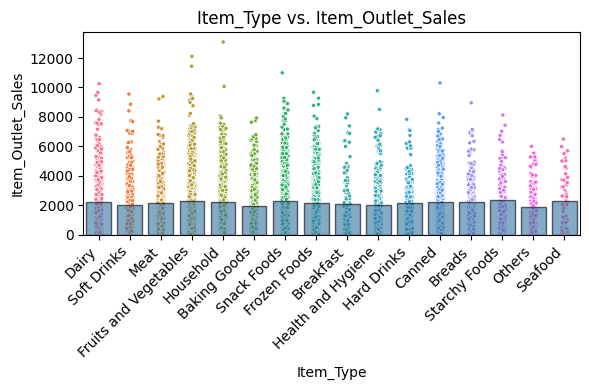

In [78]:
#testing the function.
fig, ax = plot_categorical_vs_target(df_clean, x='Item_Type', fillna=False)


#yes i expect this feature to predict the future of business.

##yes item can be used to predict future target